In [37]:
import os
import json
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import rcParams
import urllib

from Chandra.Time import DateTime
import Chandra.cmd_states as cmd_states
import Ska.engarchive.fetch as fetch
import Ska.engarchive.fetch_eng as fetch_eng
import xija

from plot_cxctime_custom import *

%matplotlib notebook


In [45]:
def fptemp_prod(tstart, tstop):
    model_spec_url = 'https://raw.githubusercontent.com/sot/chandra_models/df81ac171b38f750573717e4815a841667c5f1bd/chandra_models/xija/acisfp/acisfp_spec.json'
    response = urllib.urlopen(model_spec_url);
    model_spec = json.loads(response.read())

    model = xija.ThermalModel('acisfp', start=tstart, stop=tstop, model_spec=model_spec)


    model.make()
    model.calc()
    msiddata = model.get_comp('fptemp')

    prediction = msiddata.mvals
    #telem = msiddata.dvals
    times = msiddata.times

    modellimits = {'units': 'C', 'caution_high': None, 'planning_limit': -114.0}

    return msiddata

In [46]:
# 80 Day Span
tstart1 = '2015:142:00:00:00'
tstop1 = '2015:222:00:00:00'
mdata1 = fptemp_prod(tstart1, tstop1)

tstart2 = '2015:223:00:00:00'
tstop2 = '2015:303:00:00:00'
mdata2 = fptemp_prod(tstart2, tstop2)


Fetching msid: fptemp_11 over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: 1cbat over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: pitch over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: 1dahtbon over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: aoeclips over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: sim_z over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Reading commanded states DB over 2015:142:00:02:00.816 to 2015:221:23:50:08.816
Fetching msid: dp_dpa_power over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: orbitephem0_x over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: orbitephem0_y over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: orbitephem0_z over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: aoattqt1 over 2015:141:23:34:40.816 to 2015:222:00:17:28.816
Fetching msid: aoattqt2 over 2015:141:23:34:40.816 to 2015:222:00:17:28.8

In [47]:
times1 = mdata1.times
fptemp1 = fetch.Msid('fptemp_11', tstart1, tstop1)
fpint1 = sp.interpolate.interp1d(fptemp1.times, fptemp1.vals)
telem1 = fpint1(times1) - 273.15

times2 = mdata2.times
fptemp2 = fetch.Msid('fptemp_11', tstart2, tstop2)
fpint2 = sp.interpolate.interp1d(fptemp2.times, fptemp2.vals)
telem2 = fpint2(times2) - 273.15

In [48]:
TICKLOCS = (
#             (YearLocator, {'base': 2}, '%Y', YearLocator, {'base': 1}),
#             (YearLocator, {'base': 1}, '%Y', MonthLocator, {'bymonth': (1, 4, 7, 10)}),

#             (MonthLocator, {'bymonth': range(1, 13, 6)}, '%Y-%b', MonthLocator, {}),
#             (MonthLocator, {'bymonth': range(1, 13, 4)}, '%Y-%b', MonthLocator, {}),
#             (MonthLocator, {'bymonth': range(1, 13, 3)}, '%Y-%b', MonthLocator, {}),
#             (MonthLocator, {'bymonth': range(1, 13, 2)}, '%Y-%b', MonthLocator, {}),
#             (MonthLocator, {},         '%Y-%b', DayLocator, {'bymonthday': (1, 15)}),

            (DayLocator, {'interval': 10}, '%Y:%j', DayLocator, {}),
            (DayLocator, {'interval': 5}, '%Y:%j', DayLocator, {}),
            (DayLocator, {'interval': 4}, '%Y:%j', DayLocator, {}),
            (DayLocator, {'interval': 2}, '%Y:%j', DayLocator, {}),
            (DayLocator, {'interval': 1}, '%Y:%j', HourLocator, {'byhour': (0, 6, 12, 18)}),

            (HourLocator, {'byhour': range(0, 24, 12)}, '%j:%H:00', HourLocator, {}),
            (HourLocator, {'byhour': range(0, 24, 6)}, '%j:%H:00', HourLocator, {}),
            (HourLocator, {'byhour': range(0, 24, 4)}, '%j:%H:00', HourLocator, {}),
            (HourLocator, {'byhour': range(0, 24, 2)}, '%j:%H:00', HourLocator, {}),
            (HourLocator, {}, '%j:%H:00', MinuteLocator, {'byminute': (0, 15, 30, 45)}),

            (MinuteLocator, {'byminute': (0, 30)}, '%j:%H:%M', MinuteLocator, {'byminute': range(0,60,5)}),
            (MinuteLocator, {'byminute': (0, 15, 30, 45)}, '%j:%H:%M', MinuteLocator, {'byminute': range(0,60,5)}),
            (MinuteLocator, {'byminute': range(0, 60, 10)}, '%j:%H:%M', MinuteLocator, {}),
            (MinuteLocator, {'byminute': range(0, 60, 5)}, '%j:%H:%M', MinuteLocator, {}),
            (MinuteLocator, {'byminute': range(0, 60, 4)}, '%j:%H:%M', MinuteLocator, {}),
            (MinuteLocator, {'byminute': range(0, 60, 2)}, '%j:%H:%M', MinuteLocator, {}),
            (MinuteLocator, {}, '%j:%H:%M', SecondLocator, {'bysecond': (0, 15, 30, 45)}),

            (SecondLocator, {'bysecond': (0, 30)}, '%H:%M:%S', SecondLocator, {'bysecond': range(0,60,5)}),
            (SecondLocator, {'bysecond': (0, 15, 30, 45)}, '%H:%M:%S', SecondLocator, {'bysecond': range(0,60,5)}),
            (SecondLocator, {'bysecond': range(0, 60, 10)}, '%H:%M:%S', SecondLocator, {}),
            (SecondLocator, {'bysecond': range(0, 60, 5)}, '%H:%M:%S', SecondLocator, {}),
            (SecondLocator, {'bysecond': range(0, 60, 4)}, '%H:%M:%S', SecondLocator, {}),
            (SecondLocator, {'bysecond': range(0, 60, 2)}, '%H:%M:%S', SecondLocator, {}),
            (SecondLocator, {}, '%H:%M:%S', SecondLocator, {}),
            )


<IPython.core.display.Javascript object>


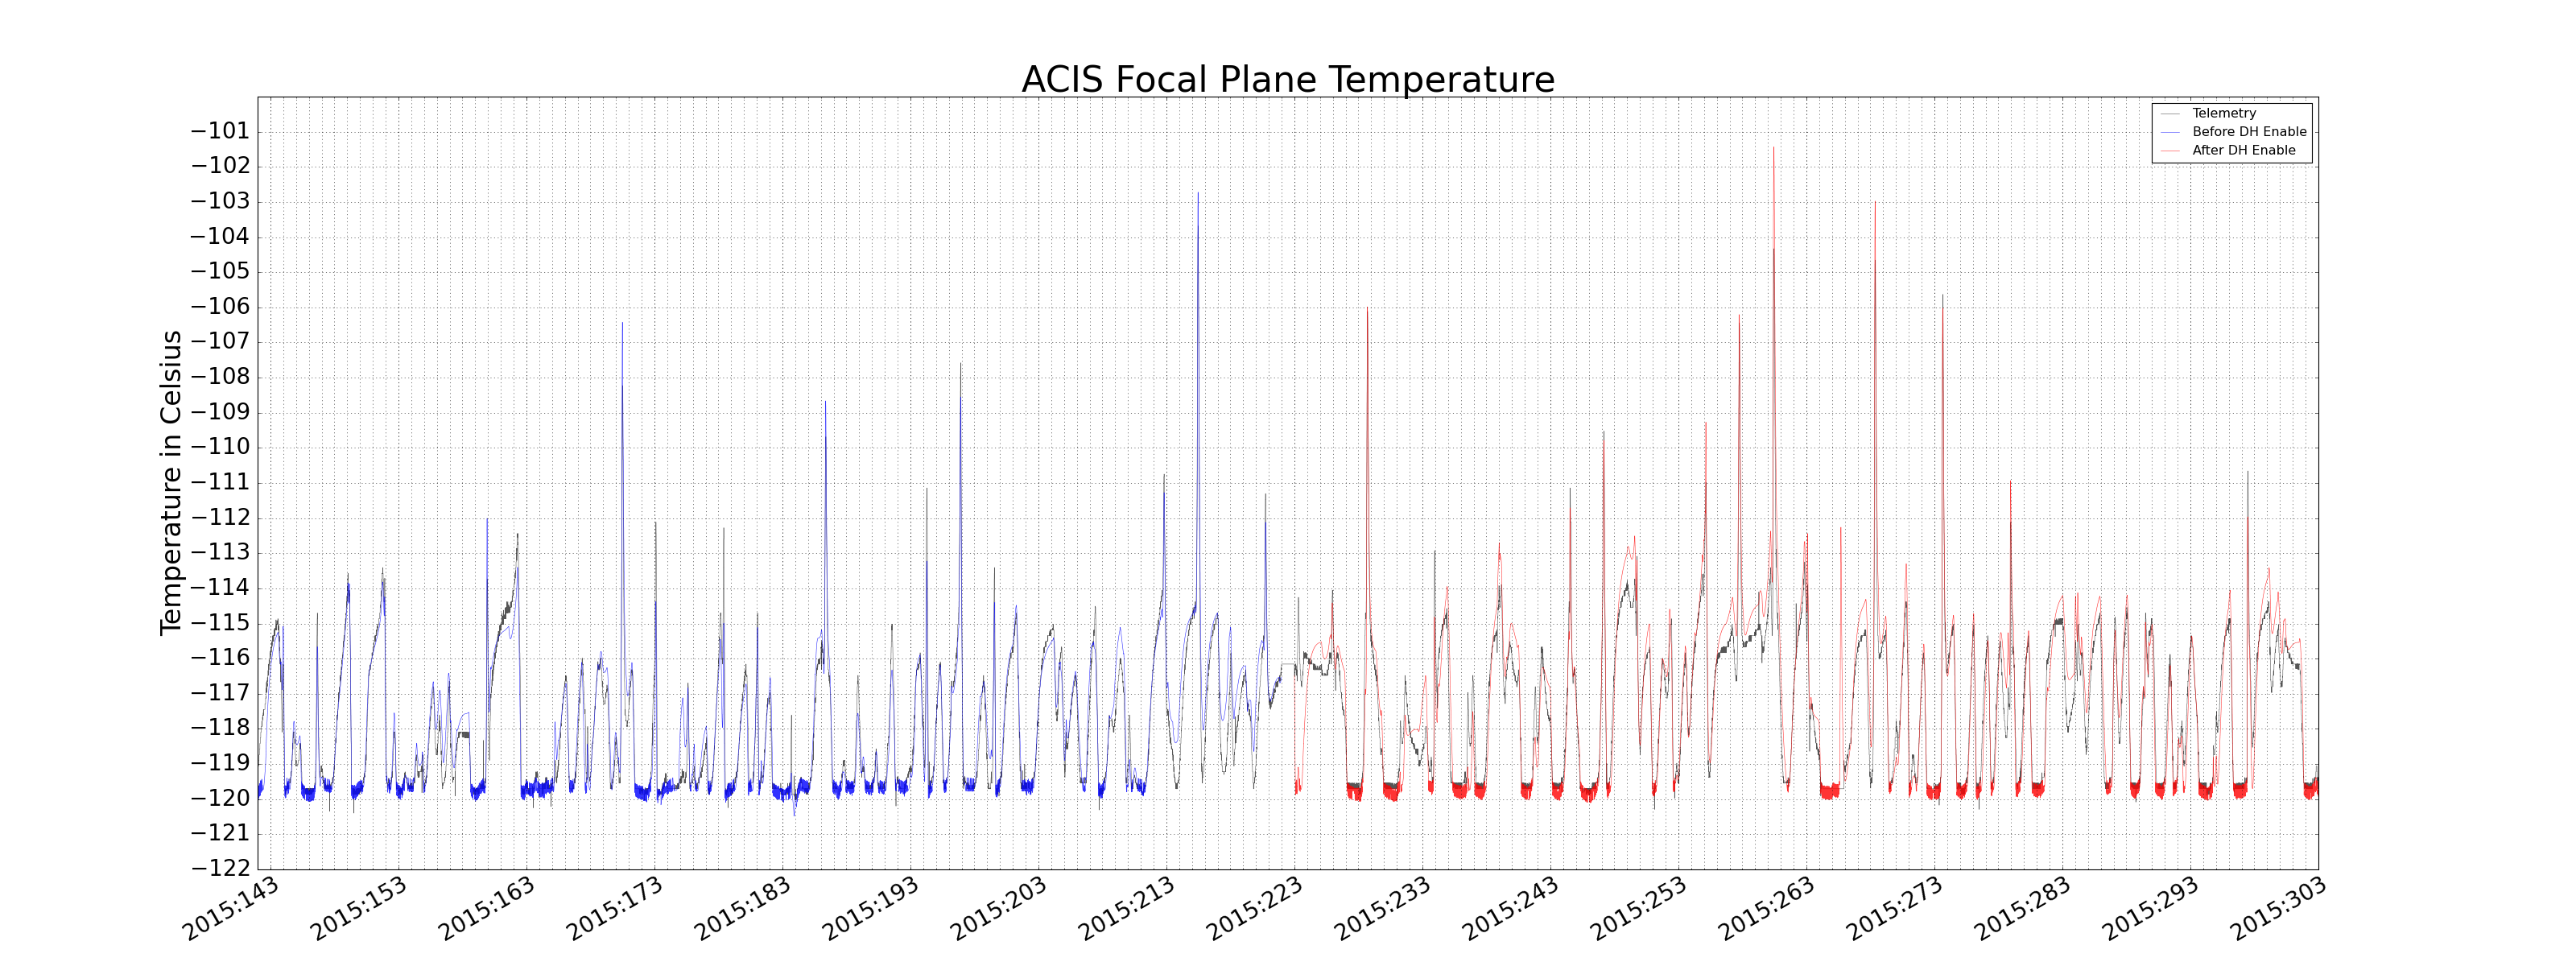

In [55]:
rcParams['xtick.major.pad'] = 5
rcParams['ytick.major.pad'] = 10

plt.close(plt.gcf())
fig = plt.figure(facecolor=[1,1,1],figsize=(40,15))
fig.set_label('ACIS_FP')
ax = fig.add_axes([.1, .1, .8, .8])
ax.hold(True)

_ = ax.set_xlim(cxctime2plotdate(DateTime([tstart1, tstop2]).secs))

times = np.hstack((times1, times2))
telem = np.hstack((telem1, telem2))
ticklocs, fig, ax = plot_cxctime(times, telem, fig=fig, ax=ax, linewidth=.5, color='#555555', label='Telemetry')

ticklocs, fig, ax = plot_cxctime(times1, mdata1.mvals, fig=fig, ax=ax, linewidth=.5, color='blue', alpha=0.8, label='Before DH Enable')
ticklocs, fig, ax = plot_cxctime(times2, mdata2.mvals, fig=fig, ax=ax, linewidth=.5, color='red', alpha=0.8, label='After DH Enable')

set_time_ticks(ax, ticklocs=TICKLOCS)
ax.grid(True, which='both')
ax.set_ylim(-122, -100)
plt.setp(ax.xaxis.get_majorticklabels(), rotation_mode='anchor', ha='right')
ax.set_yticks(range(-122, -100,1))
ax.legend(loc='best')
ax.set_title('ACIS Focal Plane Temperature', fontsize=40)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)

ax.set_ylabel('Temperature in Celsius', fontsize=30)
fig.set_facecolor([1,1,1,1])
fig.savefig('ACIS_FP_Production_Model.png', bbox_to_inches='tight', facecolor='w', edgecolor='w')

<IPython.core.display.Javascript object>


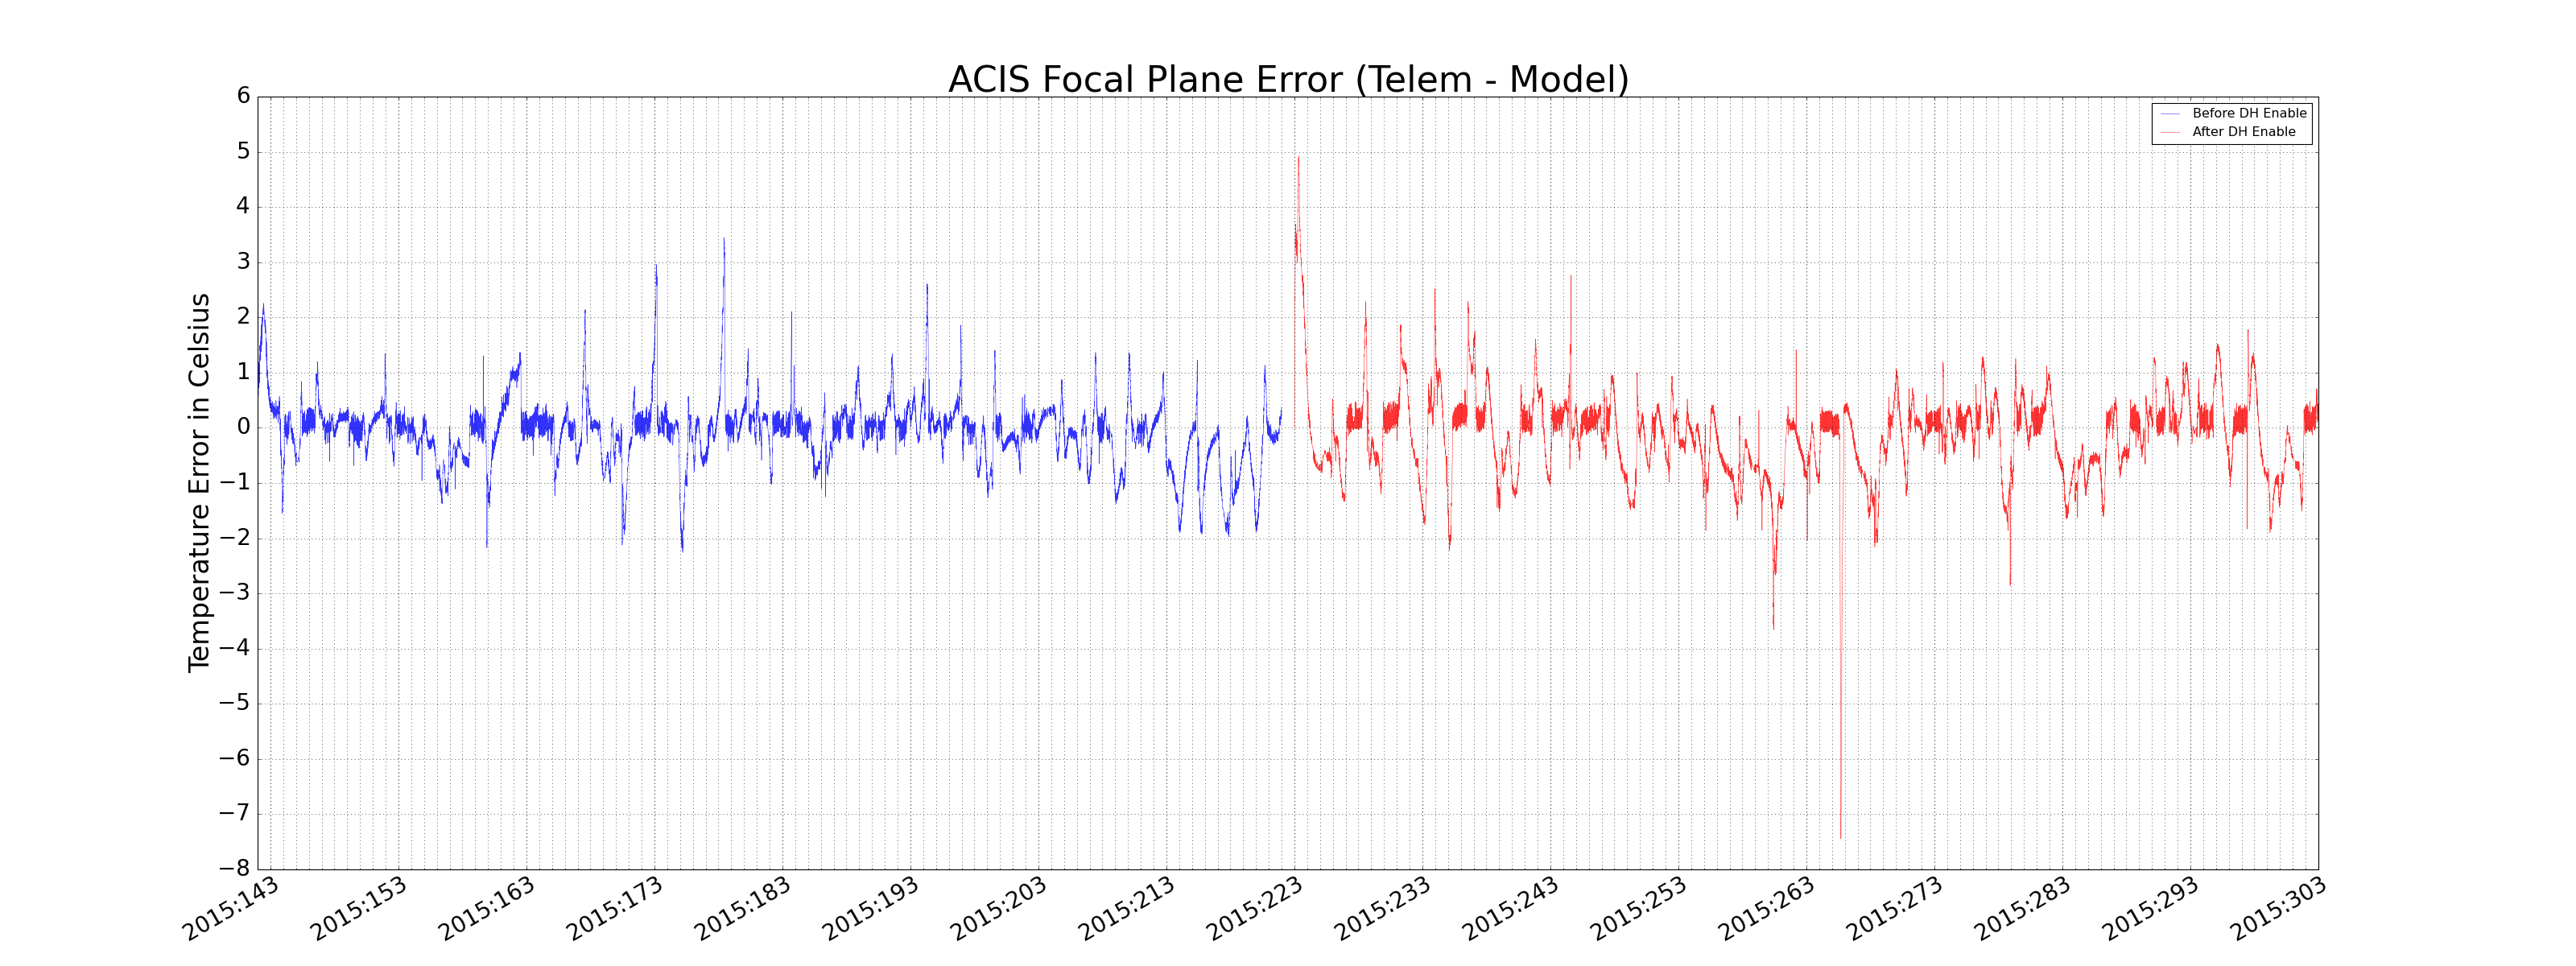

In [56]:
rcParams['xtick.major.pad'] = 5
rcParams['ytick.major.pad'] = 10

plt.close(plt.gcf())
fig = plt.figure(facecolor=[1,1,1],figsize=(40,15))
fig.set_label('ACIS_FP Error')
ax = fig.add_axes([.1, .1, .8, .8])
ax.hold(True)

_ = ax.set_xlim(cxctime2plotdate(DateTime([tstart1, tstop2]).secs))

# times = np.hstack((times1, times2))
# telem = np.hstack((telem1, telem2))
# ticklocs, fig, ax = plot_cxctime(times, telem, fig=fig, ax=ax, linewidth=.5, color='#555555', label='Telemetry')

ticklocs, fig, ax = plot_cxctime(times1, telem1 - mdata1.mvals, fig=fig, ax=ax, linewidth=.5, color='blue', alpha=0.8, label='Before DH Enable')
ticklocs, fig, ax = plot_cxctime(times2, telem2 - mdata2.mvals, fig=fig, ax=ax, linewidth=.5, color='red', alpha=0.8, label='After DH Enable')

set_time_ticks(ax, ticklocs=TICKLOCS)
ax.grid(True, which='both')
# ax.set_ylim(-122, -100)
plt.setp(ax.xaxis.get_majorticklabels(), rotation_mode='anchor', ha='right')
ax.set_yticks(np.arange(-8, 7, 1))
ax.legend(loc='best')
ax.set_title('ACIS Focal Plane Error (Telem - Model)', fontsize=40)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
ax.set_ylabel('Temperature Error in Celsius', fontsize=30)


fig.set_facecolor([1,1,1,1])
fig.savefig('ACIS_FP_Production_Model_Error_Time.png', bbox_to_inches='tight', facecolor='w', edgecolor='w')

<IPython.core.display.Javascript object>


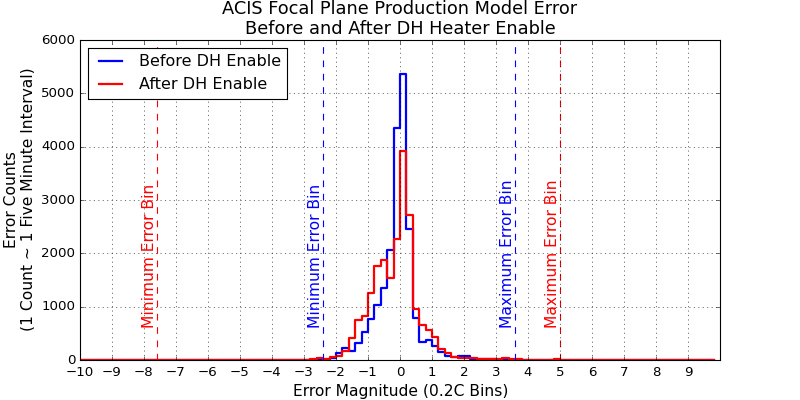

In [57]:
rcParams['xtick.major.pad'] = 5
rcParams['ytick.major.pad'] = 5

binwidth = 0.2
bins = np.arange(-10, 10, binwidth)
plt.close(plt.gcf())
fig = plt.figure(facecolor=[1,1,1],figsize=(10,5))
fig.set_label('ACIS_FP Production Model Error')
ax = fig.add_axes([.1, .1, .8, .8])
ax.hold(True)

d1 = np.histogram(telem1-mdata1.mvals, bins=bins)
ax.plot(np.repeat(d1[1], 2)[1:-1], np.repeat(d1[0], 2), color='blue', linewidth=2, label='Before DH Enable')

d2 = np.histogram(telem2-mdata2.mvals, bins=bins)
ax.plot(np.repeat(d2[1], 2)[1:-1], np.repeat(d2[0], 2), color='red', linewidth=2, label='After DH Enable')

minind = np.where(d1[0] > 0)[0][0]
maxind = np.where(d1[0] > 0)[0][-1]
l = plt.axvline(d1[1][minind], linewidth=1, color='blue', linestyle='--')
l = plt.axvline(d1[1][maxind] + binwidth, linewidth=1, color='blue', linestyle='--')
ylim = ax.get_ylim()
ystart = (ylim[1] - ylim[0]) / 10 + ylim[0]
_ = ax.text(d1[1][minind], ystart, 'Minimum Error Bin', ha='right', va='bottom', rotation=90, size=14, color='blue')
_ = ax.text(d1[1][maxind] + binwidth, ystart, 'Maximum Error Bin', ha='right', va='bottom', rotation=90, size=14, color='blue')


minind = np.where(d2[0] > 0)[0][0]
maxind = np.where(d2[0] > 0)[0][-1]
l = plt.axvline(d2[1][minind], linewidth=1, color='red', linestyle='--')
l = plt.axvline(d2[1][maxind] + binwidth, linewidth=1, color='red', linestyle='--')
ylim = ax.get_ylim()
ystart = (ylim[1] - ylim[0]) / 10 + ylim[0]
_ = ax.text(d2[1][minind], ystart, 'Minimum Error Bin', ha='right', va='bottom', rotation=90, size=14, color='red')
_ = ax.text(d2[1][maxind] + binwidth, ystart, 'Maximum Error Bin', ha='right', va='bottom', rotation=90, size=14, color='red')

ax.set_ylabel('Error Counts\n(1 Count ~ 1 Five Minute Interval)', fontsize=14)
ax.set_xlabel('Error Magnitude (0.2C Bins)', fontsize=14)

ax.set_xticks(range(-10, 10, 1))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
ax.grid(True)
ax.legend(loc='best')

ax.set_title('ACIS Focal Plane Production Model Error\nBefore and After DH Heater Enable', fontsize=16)
fig.savefig('ACIS_FP_Production_Model_Error_Hist.png', bbox_to_inches='tight', facecolor='w', edgecolor='w')